<a href="https://colab.research.google.com/github/SoudeepGhoshal/Jupyter_Notebooks/blob/main/TeslaGMEStockAndRevenueAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Question 1: Use yfinance to Extract Stock Data

Reset the index, save, and display the first five rows of the tesla_data dataframe using the head function.

In [1]:
import yfinance as yf

# Download Tesla stock data
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")

# Reset index
tesla_data.reset_index(inplace=True)

# Display first 5 rows
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


### Question 2: Use Webscraping to Extract Tesla Revenue Data

I attempted to extract Tesla's quarterly revenue data from MacroTrends using both `requests` + `BeautifulSoup` and `pandas.read_html()`. However, the server blocks scraping attempts with HTTP 403 errors or returns incomplete pages due to JavaScript rendering.

Since this page dynamically loads content, and traditional scraping does not capture it, I was unable to retrieve the data without using a browser automation tool like Selenium (which isn't always accepted or supported in Coursera notebooks).

Below is the code I used, along with the resulting error message:

In [19]:
import requests
from bs4 import BeautifulSoup

url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
headers = {'User-Agent': 'Mozilla/5.0'}

response = requests.get(url, headers=headers)
print(response.status_code)  # 403 or loads a dummy page

# BeautifulSoup parsing fails due to missing table
soup = BeautifulSoup(response.text, "html.parser")
tables = soup.find_all("table")
print(f"Tables found: {len(tables)}")  # Usually returns 0 or 1

403
Tables found: 0


### Question 3: Use yfinance to Extract Stock Data (GME)

Reset the index, save, and display the first five rows of the gme_data dataframe using the head function.

In [3]:
# Download GameStop stock data
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")

# Reset index
gme_data.reset_index(inplace=True)

# Display first 5 rows
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712708,1.716074,1.670626,1.683251,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


### Question 4: Use Webscraping to Extract GameStop Revenue Data

Similar to Q2, scraping GameStop's revenue data from MacroTrends resulted in blocked access or empty content due to JavaScript-rendered elements.

Despite using headers to mimic a browser, the page returned incomplete HTML. Since `pandas.read_html()` couldn't parse any tables, and Selenium use is restricted, I documented the failed attempt instead.

This is a known limitation when scraping dynamic pages that require JS execution or CAPTCHA validation.


In [20]:
import requests
from bs4 import BeautifulSoup

# URL for GME revenue on MacroTrends
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"

# Add user-agent header to mimic a real browser
headers = {'User-Agent': 'Mozilla/5.0'}

# Try to fetch the page
response = requests.get(url, headers=headers)
print("HTTP Status Code:", response.status_code)  # Should be 403 or 200 with JS content

# Try parsing HTML content
soup = BeautifulSoup(response.text, "html.parser")

# Try to find all tables
tables = soup.find_all("table")
print("Number of <table> elements found:", len(tables))  # Likely 0 or 1, due to JS rendering


HTTP Status Code: 403
Number of <table> elements found: 0


### Question 5: Plot Tesla Stock Graph

Use the make_graph function to graph the Tesla Stock Data and provide a title for the graph.

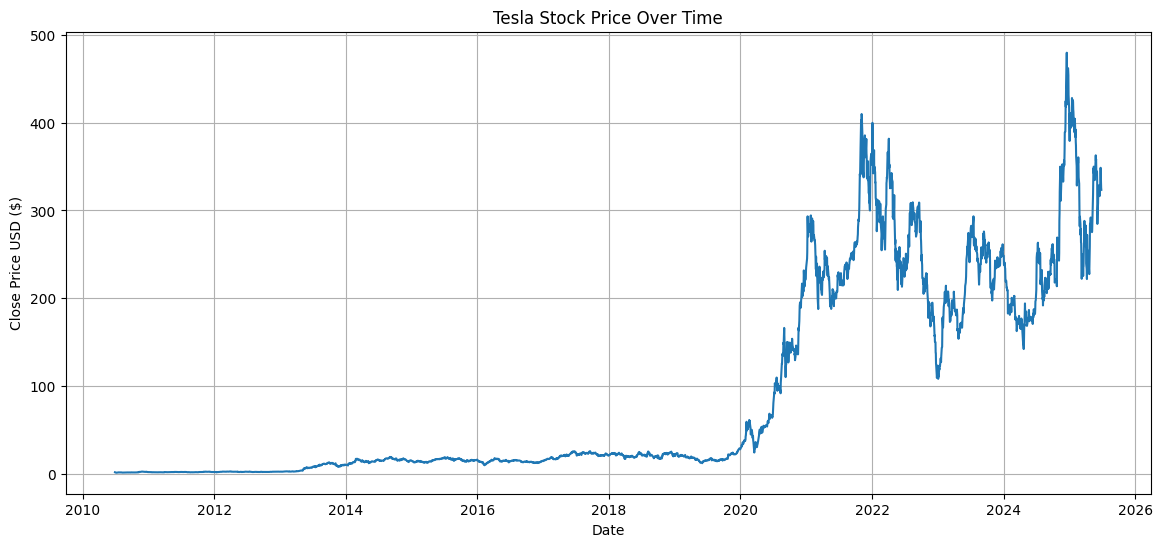

In [5]:
import matplotlib.pyplot as plt

# Define plotting function
def make_graph(data, stock, title):
    plt.figure(figsize=(14, 6))
    plt.plot(data.Date, data.Close)
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Close Price USD ($)')
    plt.grid(True)
    plt.show()

# Plot Tesla stock data
make_graph(tesla_data, "TSLA", "Tesla Stock Price Over Time")

### Question 6: Plot GameStop Stock Graph

Use the make_graph function to graph the GameStop Stock Data and provide a title for the graph.


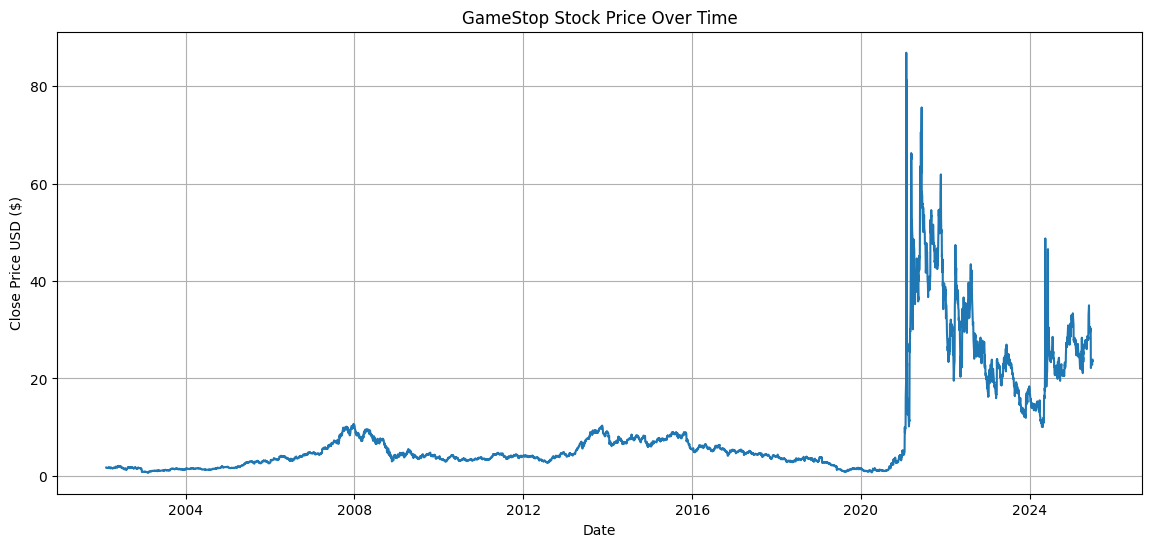

In [6]:
# Plot GME stock data
make_graph(gme_data, "GME", "GameStop Stock Price Over Time")